# Seaborn tutorial 2

### Resources:
- http://seaborn.pydata.org/tutorial

## 3-Distribution plot

### APIs:

#### univariate distributions:

- distplot()

- kdeplot()

- rugplot()

#### bivariate distributions:

- jointplot()

- kdeplot(0

- rugplot()

- pairplot()


In [1]:
import numpy as np
import pandas as pd
from scipy import stats, integrate

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
sns.set(color_codes=True)

In [5]:
np.random.seed(sum(map(ord, "distributions")))

## Plotting univariate distributions

### distplot()

The most convenient way to take a quick look at a univariate distribution in seaborn is the __distplot()__ function. By default, this will draw a histogram and fit a __kernel density estimate (KDE)__.

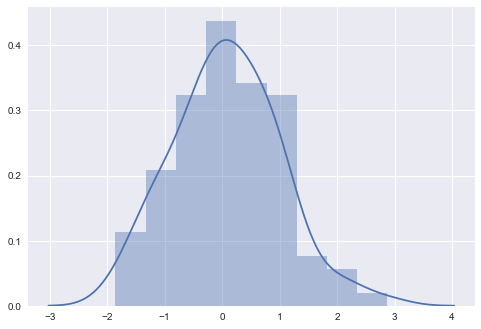

In [6]:
x = np.random.normal(size=100)
sns.distplot(x)

### Histograms

Histograms are likely familiar, and a __hist__ function already exists in matplotlib.

(array([  4.,  13.,  12.,  22.,  20.,  15.,   9.,   1.,   3.,   1.]),
 array([-1.85860798, -1.38515154, -0.91169511, -0.43823868,  0.03521775,
         0.50867418,  0.98213061,  1.45558704,  1.92904348,  2.40249991,
         2.87595634]),
 <a list of 10 Patch objects>)

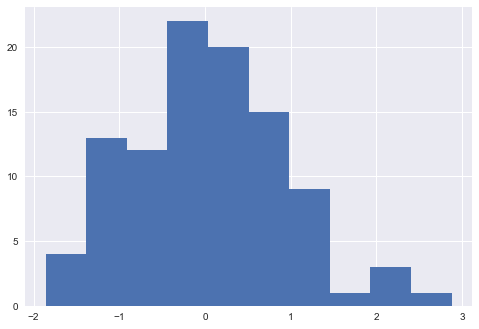

In [7]:
plt.hist(x)

To plot only the histogram of a data without its kde estimation and add a rugplot which draws small ticks at each sample, thers is 2 ways:

1. using __distplot(., kde=False, rug=True)__

2. using __rugplot(.)__

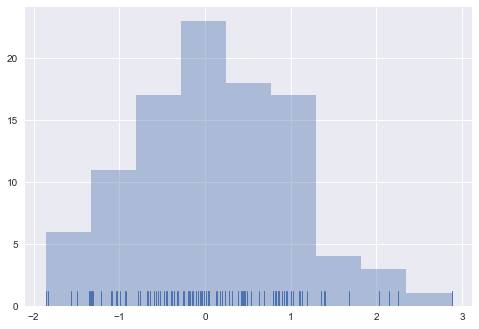

In [8]:
sns.distplot(x, kde=False, rug=True)

__setting *bins*:__

the only choice in drawing a histogram is to set number of __bins__

__distplot(., bins=#bins)__

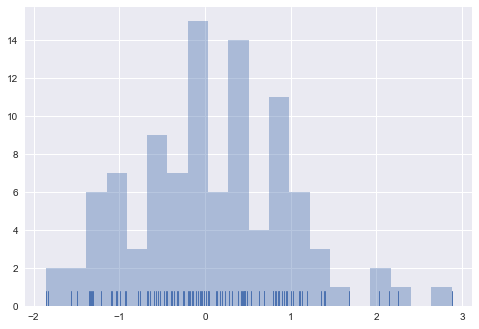

In [9]:
sns.distplot(x, bins=20, kde=False, rug=True)

### Kernel density estimaton


There is 2 ways to only plot __KDE__:

1. __distplot(., hist=False, KDE=True)__

2. __kdeplot(.)__

using __kdeplot()__ has the benefit of more flexibility in plotting kde

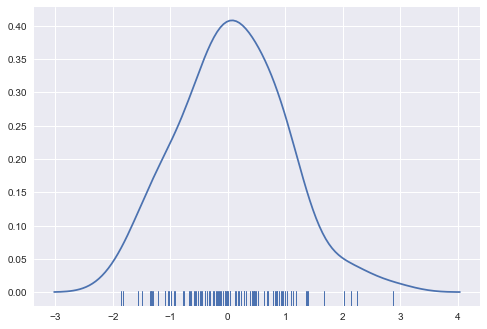

In [10]:
sns.distplot(x, hist=False, kde=True, rug=True)

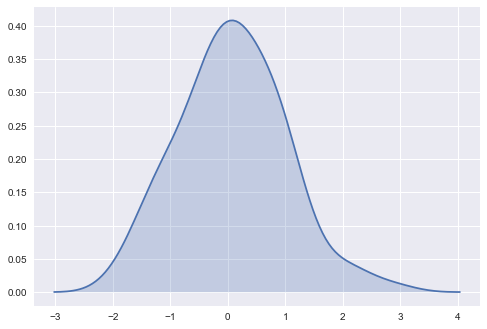

In [11]:
sns.kdeplot(x, shade=True)

### Manual plotting of KDE:

What happens is that each observation is first replaced with a normal (Gaussian) curve centered at that value,

Next, these curves are summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under it is equal to .

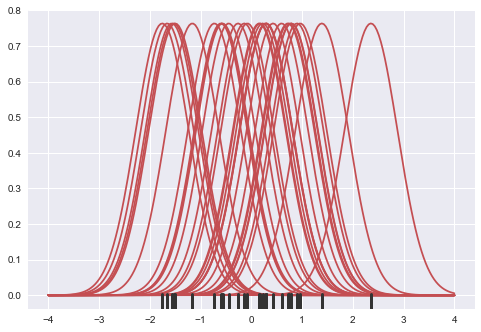

In [12]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1/5.0)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color='r')
    
sns.rugplot(x, color='0.2', lw=3)

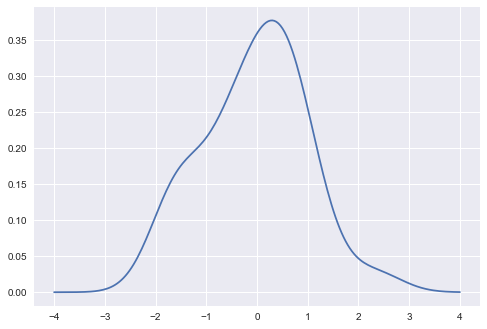

In [13]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density)

__bandwidth__

The __bandwidth (bw)__ parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above. The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values:

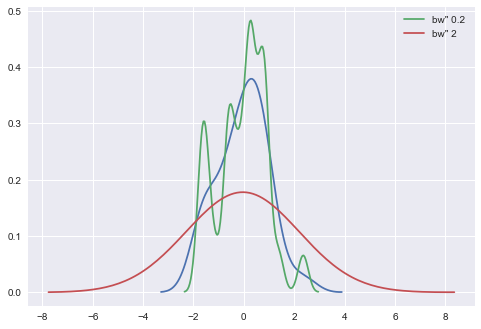

In [14]:
sns.kdeplot(x)
sns.kdeplot(x, bw=0.2, label='bw" 0.2')
sns.kdeplot(x, bw=2, label='bw" 2')
plt.legend()

__cut__

It’s possible to control how far past the extreme values the curve is drawn with the cut parameter; however, this only influences how the curve is drawn and not how it is fit:

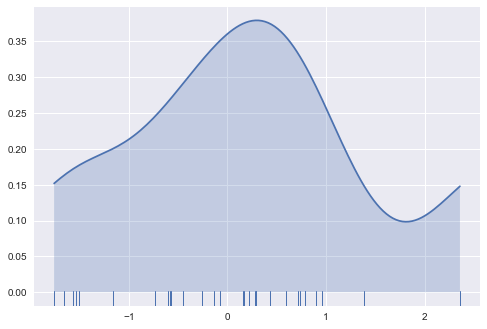

In [15]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x)

### Fitting parametric distributions

You can also use distplot() to fit a parametric distribution to a dataset and visually evaluate how closely it corresponds to the observed data:

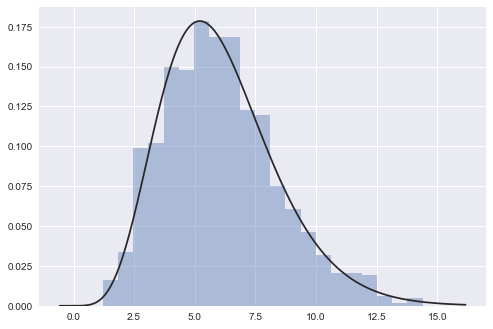

In [16]:
x = np.random.gamma(6, size=1000)
sns.distplot(x, kde=False, fit=stats.gamma)

## Plotting bivariate distributions

It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just the __jointplot()__ function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.

In [17]:
mean, cov = [0,1], [(1,0.5), (0.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=['x', 'y'])

### Scatterplots

The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the x and y values. This is analgous to a rug plot on two dimensions. You can draw a scatterplot with the matplotlib __plt.scatter__ function, and it is also the default kind of plot shown by the __jointplot()__ function:

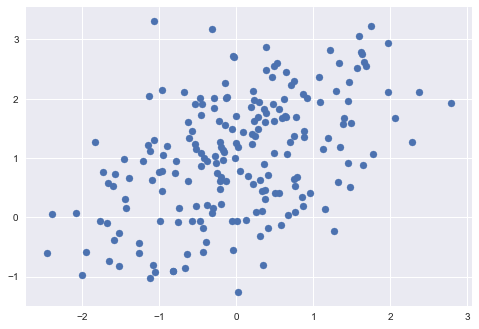

In [18]:
plt.scatter(df.x, df.y)

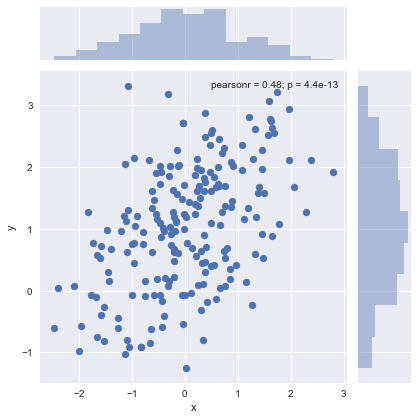

In [19]:
sns.jointplot(x='x', y='y', data=df)

### Hexbin plots

The bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It’s availible through the matplotlib __plt.hexbin__ function and as a style in __jointplot()__. It looks best with a white background:

In [20]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T

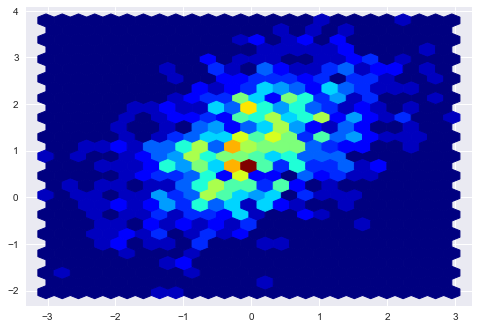

In [21]:
plt.hexbin(x, y, gridsize=25, cmap='jet')

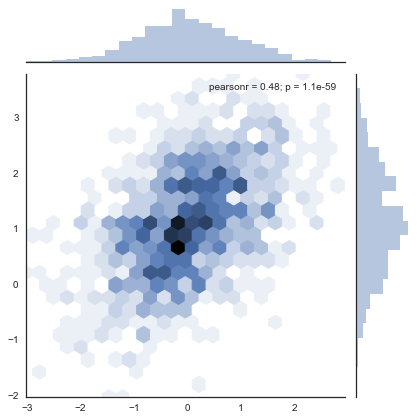

In [22]:
with sns.axes_style('white'):
    sns.jointplot(x=x, y=y, kind='hex', color='b')

### Kernel density estimation

It is also posible to use the kernel density estimation procedure described above to visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot.

There is 2 ways for bivariate kde plotting:

1. __jointplot(x, y, kind='kde')__

2. __kdeplot(x, y)__

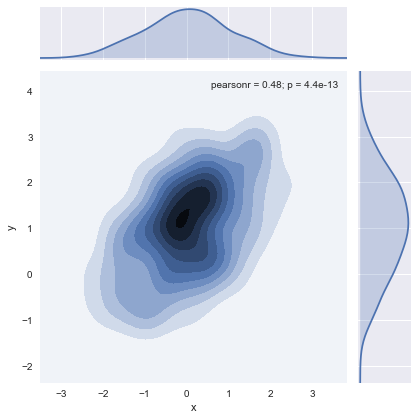

In [23]:
sns.jointplot(x='x', y='y', data=df, kind='kde')

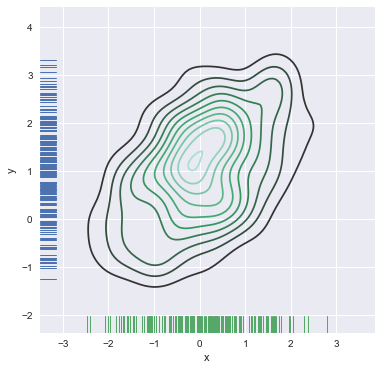

In [24]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

To show the bivariate density more continuously, you can simply increase the number of contour levels:

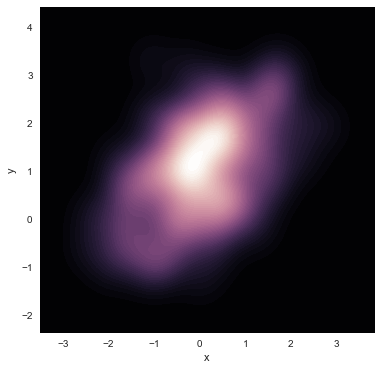

In [25]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

The __jointplot()__ function uses a __JointGrid__ to manage the figure. For more flexibility, you may want to draw your figure by using __JointGrid__ directly. __jointplot()__ returns the __JointGrid__ object after plotting, which you can use to add more layers or to tweak other aspects of the visualization:

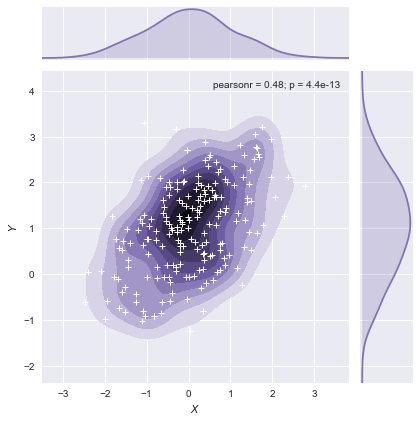

In [26]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

### Visualizing pairwise relationships in a dataset

To plot multiple pairwise bivariate distributions in a dataset, you can use the __pairplot()__ function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. by default, it also draws the univariate distribution of each variable on the diagonal Axes:

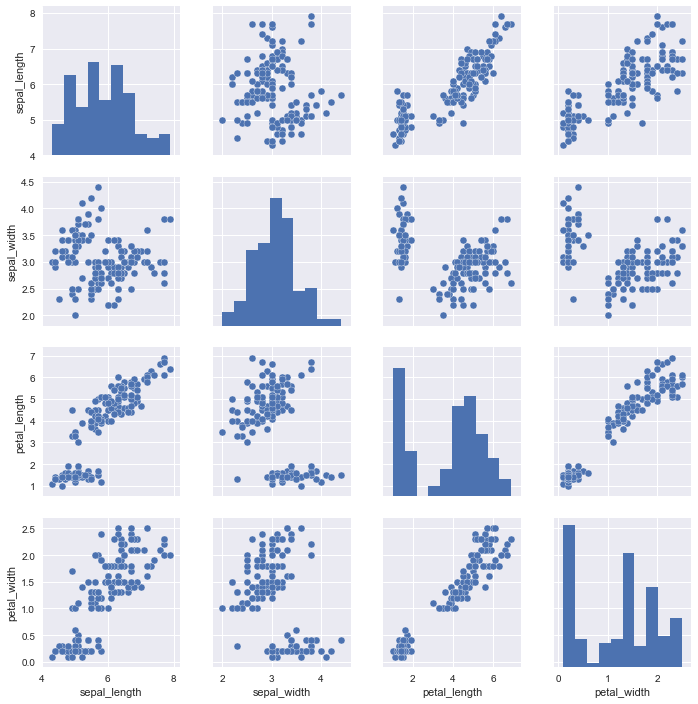

In [27]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

Much like the relationship between __jointplot()__ and __JointGrid__, the __pairplot()__ function is built on top of a __PairGrid__ object, which can be used directly for more flexibility:

C:\Users\hossein\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


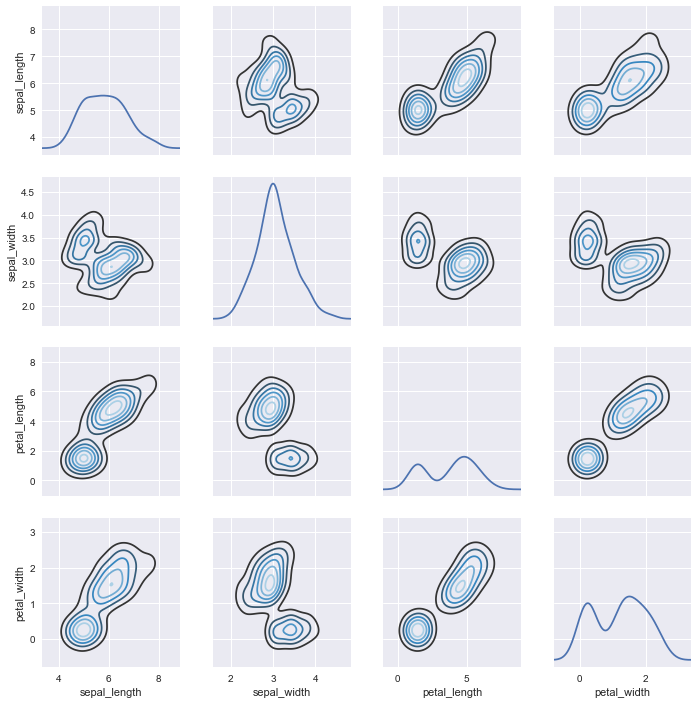

In [28]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

# 4-Regression plots

Many datasets contain multiple quantitative variables, and the goal of an analysis is often to relate those variables to each other. 
seaborn is not itself a package for statistical analysis. To obtain quantitative measures related to the fit of regression models, you should use __statsmodels__. The goal of seaborn, however, is to make exploring a dataset through visualization quick and easy, as doing so is just as (if not more) important than exploring a dataset through tables of statistics.

### ََAPIs:

- __regplot()__

- __lmplot()__

- __residplot()__



In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
np.random.seed(sum(map(ord, "regression")))

In [5]:
tips = sns.load_dataset("tips")

## Functions to draw linear regression models

Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, __regplot()__ and __lmplot()__ are closely related, and share much of their core functionality. 

In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression:

### regplot() vs lmplot(); differences:

1. __input data__:

    A. regplot():  __numpy array__, __pandas Seris Object__, __references params__
        
    B. lmplot():   __long-form__ or __"tidy"__ :(__*data*__ is required and __*x*__ and __*y*__ must be specified as strings)

2. __multi variable conditioning:__

    A. regplot() always shows a single relationsihp
    
    B. lmplot() combines regplot() with FacetGrid to provide an easy interface to show a linear regression on “faceted” plots that allow you to explore interactions with up to three additional categorical variables.

3. __axes__:

    A. regplot():
    
    regplot is an __“axes-level” function__ draws onto a specific axes. This means that you can make mutli-panel figures yourself and control exactly where the the regression plot goes.
    
    B. lmplot():
    
    In contrast, the size and shape of the lmplot() figure is controlled through the __FacetGrid__ interface using the size and aspect parameters, which apply to each facet in the plot, not to the overall figure itself.

#### regplot()

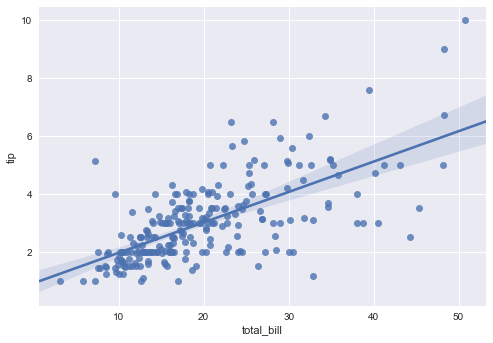

In [8]:
sns.regplot(x="total_bill", y="tip", data=tips);

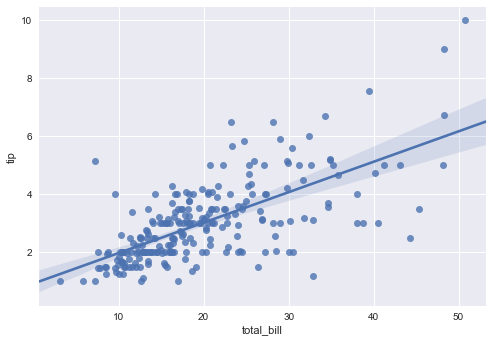

In [9]:
data = tips
sns.regplot(x=data.total_bill, y=data.tip);

#### lmplot()

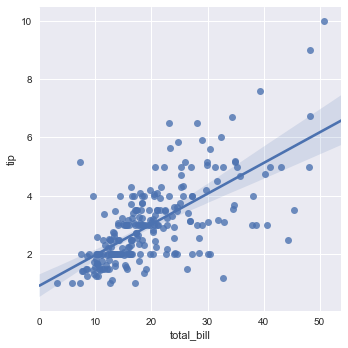

In [11]:
sns.lmplot(x="total_bill", y="tip", data=tips);

## Regression of discrete valued variables:

It’s possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal:

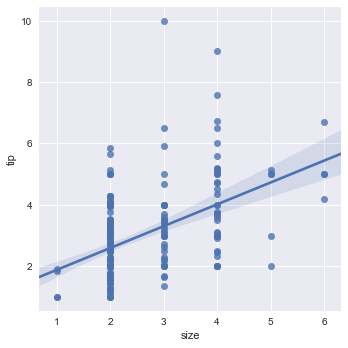

In [12]:
sns.lmplot(x="size", y="tip", data=tips);

### Jitter:

One option is to add some random noise (“__jitter__”) to the discrete values to make the distribution of those values more clear. Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself:

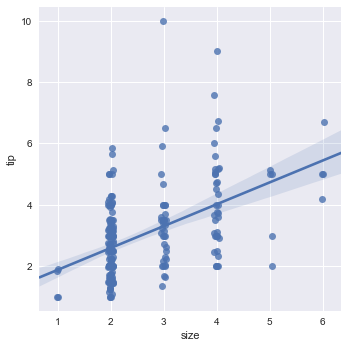

In [15]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=0.05)

### plotting an estimate of central tendency:

A second option is to collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:

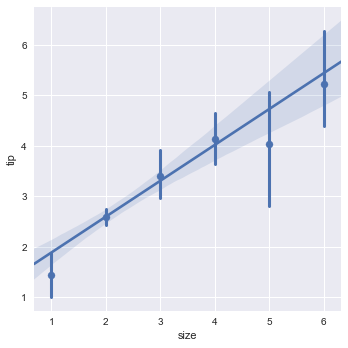

In [16]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

## Fitting different kinds of models

The __*Anscombe’s quartet*__ dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences.

### Linear Regression:

In [17]:
anscombe = sns.load_dataset("anscombe")

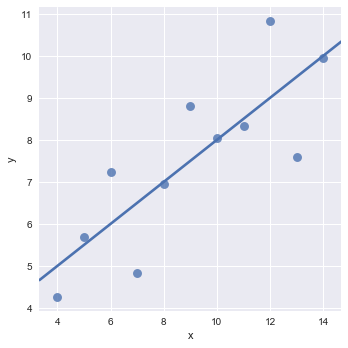

In [18]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

### Polynomial model:

parameter: __order=2__

In the presence of these kind of higher-order relationships, lmplot() and regplot() can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:

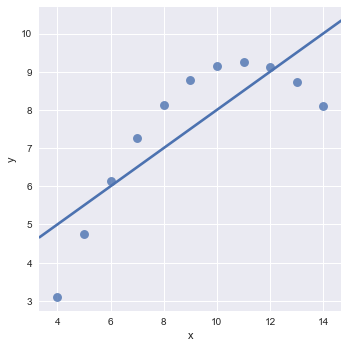

In [41]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

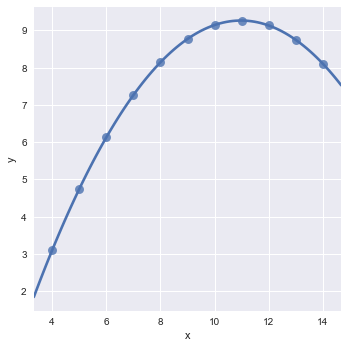

In [19]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

### outlier:

parameter: __robust=True__

A different problem is posed by “outlier” observations that deviate for some reason other than the main relationship under study:

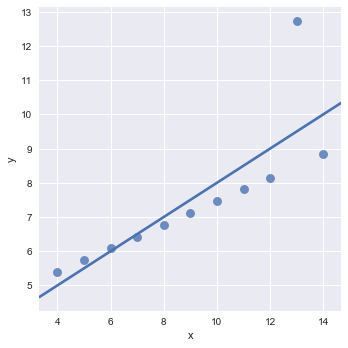

In [43]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

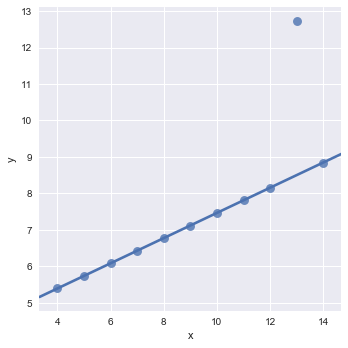

In [22]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

### Logistic Regression for binary classes:

parameter: __logistic=True__

When the y variable is binary, simple linear regression also “works” but provides implausible predictions:

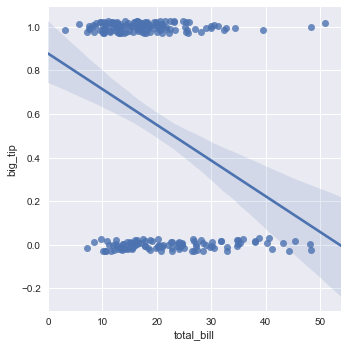

In [21]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of y = 1 for a given value of x:

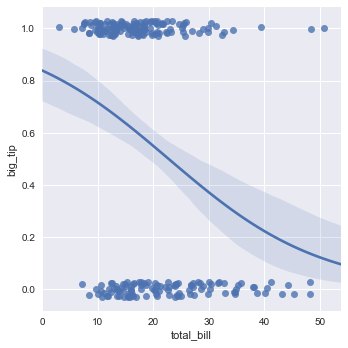

In [24]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

### Speed up regression estimate:

1. __Turn off confidence interval:__
    
    parameter: __ci=None__
    
    Note that the logistic regression estimate is considerably more computationally intensive (this is true of robust regression as well) than simple regression, and as the confidence interval around the regression line is computed using a bootstrap procedure, you may wish to turn this off for faster iteration (using ci=None).

2. __Lowess Smoother:__

    parameter: __lowess=True__
    
    An altogether different approach is to fit a nonparametric regression using a __lowess smoother__. This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all:


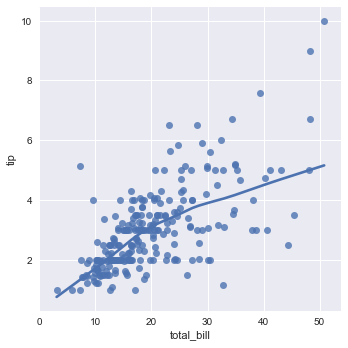

In [26]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

### plotting residual of Regression:

The __residplot()__ function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around __y = 0__:

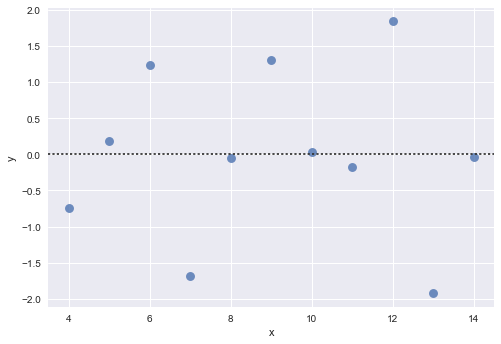

In [27]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

If there is structure in the residuals, it suggests that simple linear regression is not appropriate:

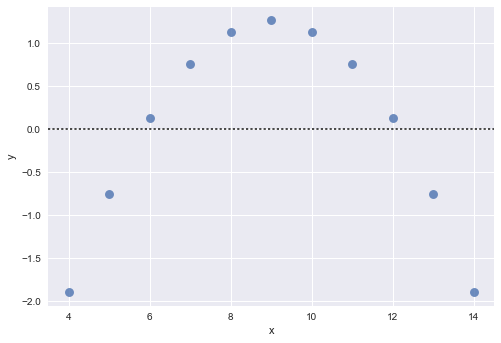

In [28]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

## Conditioning on other variables:

*parameter*: __(x="x_data", y="y_data", hue="z_data")__  (*note*: only for lmplot())

The plots above show many ways to explore the relationship between a pair of variables. Often, however, a more interesting question is __“how does the relationship between these two variables change as a function of a third variable?”__ This is where the difference between regplot() and lmplot() appears:

- __regplot()__ always shows a single relationsihp

- __lmplot()__ combines __regplot()__ with __FacetGrid__ to provide an easy interface to show a linear regression on “faceted” plots that allow you to explore interactions with __up to three__ additional categorical variables.

__distinguishing by *"Color"*__

*parameter:* __palette="palette_name"__

The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them:

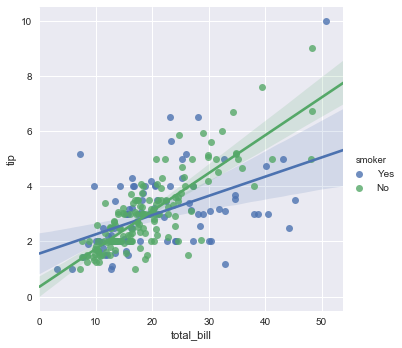

In [42]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

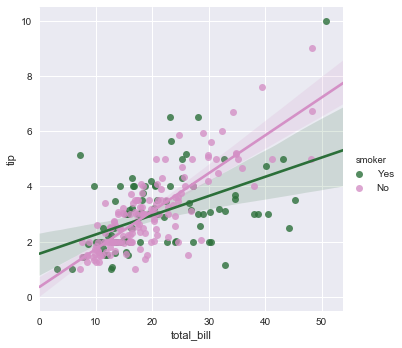

In [45]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", palette="cubehelix", data=tips);

__distinguishing by *Marker*__

*parameter*: __markers=["first_pair_marker", "second_pair_marker"]__

In addition to color, it’s possible to use different scatterplot markers to make plots the reproduce to black and white better. You also have full control over the colors used:

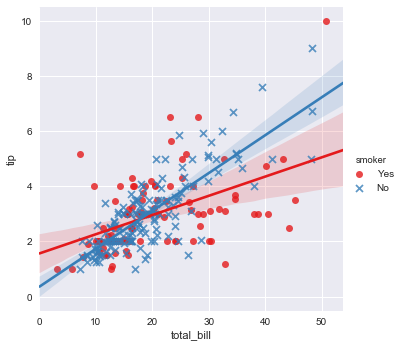

In [47]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

## Adding more Variables:

*parameters:* __col="col_data"__ , __row="row_data"__ ; (*note*:lmplot() only)

To add another variable, you can draw multiple __“facets”__ which each level of the variable appearing in the __rows__ or __columns__ of the grid:

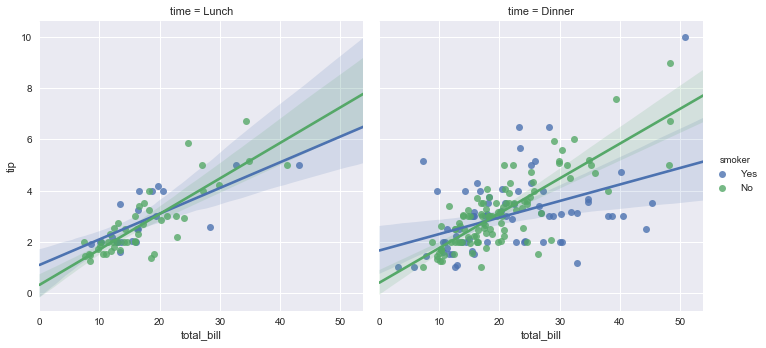

In [48]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

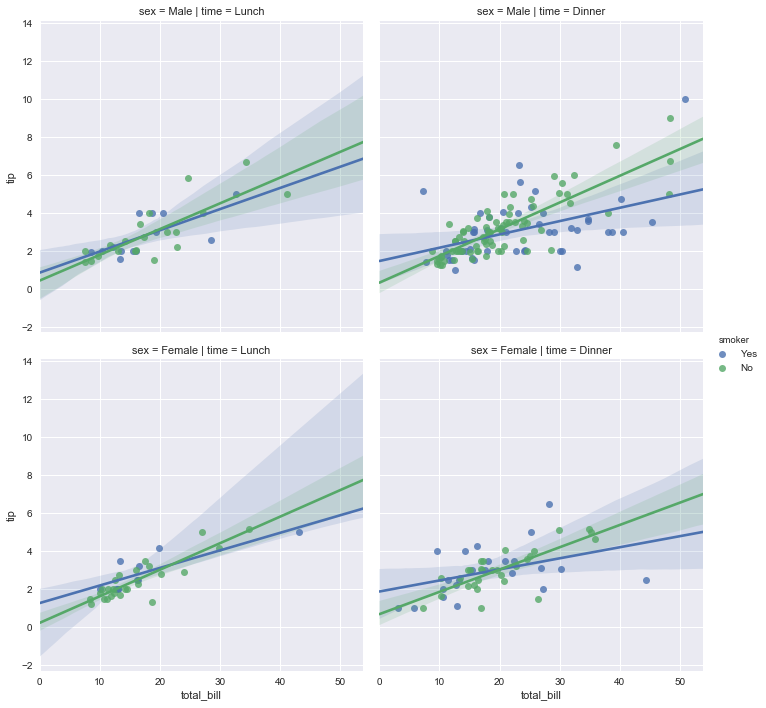

In [49]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

## Controlling the size and shape of the plot

### regplot()

*parameters:* __plt.figure(figsize=())__ or __plt.subplots(figsize=())__
(*note*:regplot() only)

Before we noted that the default plots made by regplot() and lmplot() look the same but on axes that have a different size and shape. This is because func:__regplot is an “axes-level” function__ draws onto a specific axes. This means that you can make mutli-panel figures yourself and control exactly where the the regression plot goes. If no axes is provided, it simply uses the “currently active” axes, which is why the default plot has the same size and shape as most other matplotlib functions. To control the size, you need to create a figure object yourself.

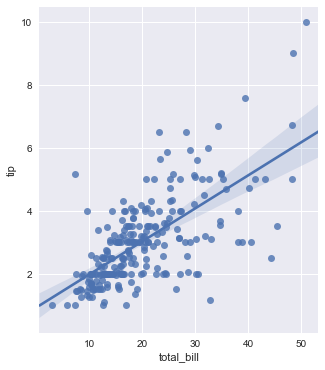

In [50]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

### lmplot()

*parameters:* __lmplot(..., col_wrap=..., size=..., aspect=...)__

In contrast, the size and shape of the __lmplot() figure is controlled through the FacetGrid__ interface using the size and aspect parameters, which apply to each facet in the plot, not to the overall figure itself:

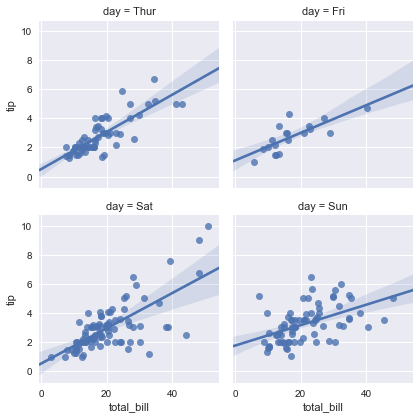

In [55]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=3);

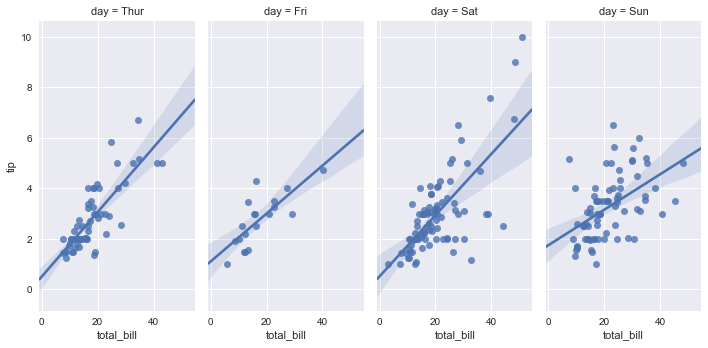

In [56]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

## Plotting a regression in other contexts

### Jointplot

*parameters:* __jointplot(x, y, kind="reg")__

A few other seaborn functions use __regplot()__ in the context of a larger, more complex plot. The first is the __jointplot()__ function that we introduced in the distributions tutorial. In addition to the plot styles previously discussed, jointplot() can use regplot() to show the linear regression fit on the joint axes by passing __kind="reg"__:

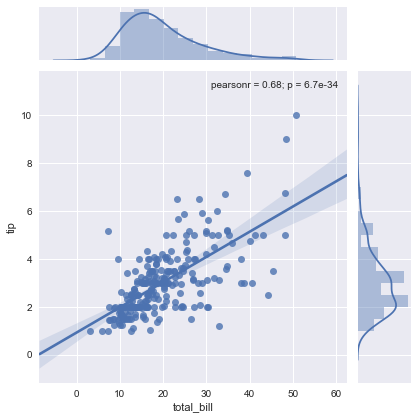

In [51]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

### pairplot()

*parameters:* __pairplot(data, x_vars=[], y_vars=[], kind="reg")__

Using the __pairplot() function with kind="reg"__ combines __regplot()__ and __PairGrid__ to show the linear relationship between variables in a dataset. 

Take care to note how this is different from __lmplot()__. In the figure below, the two axes don’t show the same relationship conditioned on two levels of a third variable; rather, __PairGrid()__ is used to show __multiple relationships between different pairings of the variables in a dataset__:


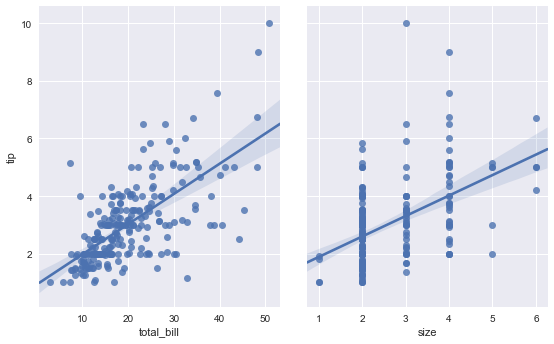

In [56]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=5, aspect=.8, kind="reg");

### Conditining in pairplot():

*parameters:* __pairplot(data, x_vars=[], y_vars=[], hue="",...)__

Like __lmplot()__, but unlike __jointplot()__, conditioning on an additional categorical variable is built into __pairplot()__ using the hue parameter:

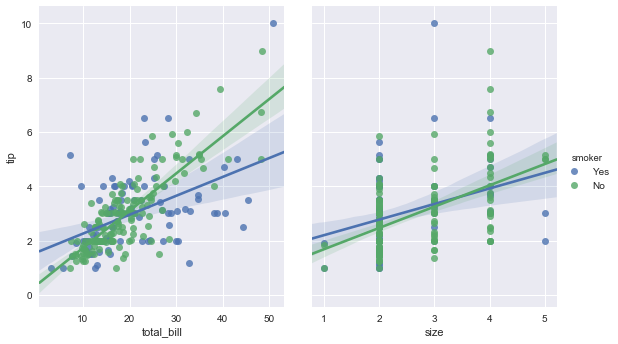

In [57]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=5, aspect=.8, kind="reg");

# 5- Categorical plots

We previously learned how to use scatterplots and regression model fits to visualize the relationship between two variables and how it changes across levels of additional categorical variables. However, what if one of the main variables you are interested in is categorical? In this case, the scatterplot and regression model approach won’t work. There are several options, however, for visualizing such a relationship, which we will discuss in this tutorial.

## APIs:

### Low-Level APIs:

It’s useful to divide seaborn’s categorical plots into three groups: 

1. those that show each observation at each level of the categorical variable:

    - __swarmplot()__
    
    - __stripplot()__

2. those that show an abstract representation of each distribution of observations:

    - __boxplot()__
    
    - __violinplot()__

3. those that apply a statistical estimation to show a measure of central tendency and confidence interval:

    - __barplot()__
    
    - __pointplot()__
    
### High-Level APIs:

   - __factorplot()__


In [58]:
%matplotlib inline

In [59]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

In [63]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [64]:
np.random.seed(sum(map(ord, "categorical")))

In [65]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

## Categorical scatterplots:

### stripplot():

A simple way to show the the values of some quantitative variable across the levels of a categorical variable uses __stripplot()__, which generalizes a __scatterplot__ to the case where one of the variables is categorical:

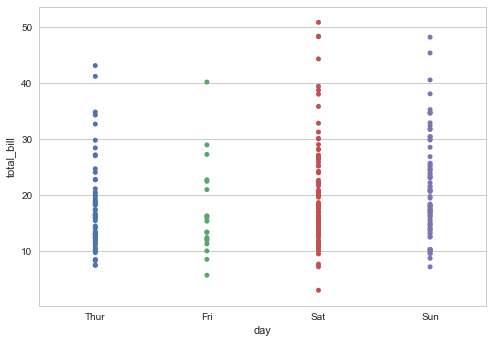

In [66]:
sns.stripplot(x='day', y='total_bill', data=tips)

__jitter__

In a strip plot, the scatterplot points will usually overlap. This makes it difficult to see the full distribution of data. One easy solution is to adjust the positions (only along the categorical axis) using some random __“jitter”__:

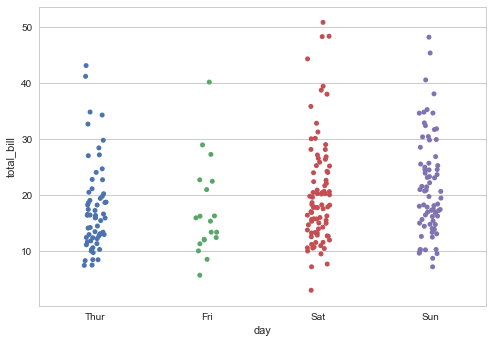

In [67]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)

### swarmplot()

A different approach would be to use the function __swarmplot()__, which positions each scatterplot point on the categorical axis with an algorithm that avoids overlapping points:

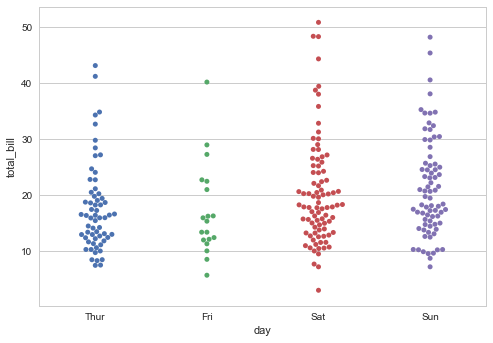

In [77]:
sns.swarmplot(x='day', y='total_bill', data=tips)

__Multivariable conditioning:__

*parameter:* __swarmplot(x, y, *hue*, data)__

It’s also possible to add a nested categorical variable with the __hue__ parameter. Above the color and position on the categorical axis are redundant, but now each provides information about one of the two variables:

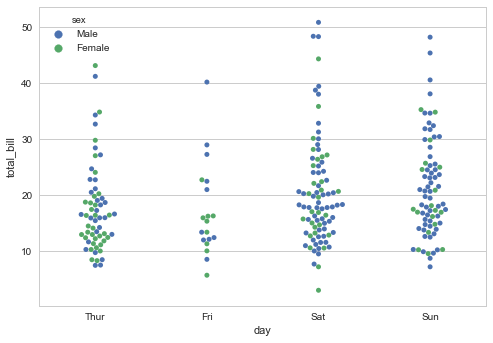

In [69]:
sns.swarmplot(x='day', y='total_bill', hue='sex', data=tips)

In general, the seaborn categorical plotting functions try to infer the order of categories from the data. If your data have a pandas Categorical datatype, then the default order of the categories can be set there. For other datatypes, string-typed categories will be plotted in the order they appear in the DataFrame, but categories that look numerical will be sorted:

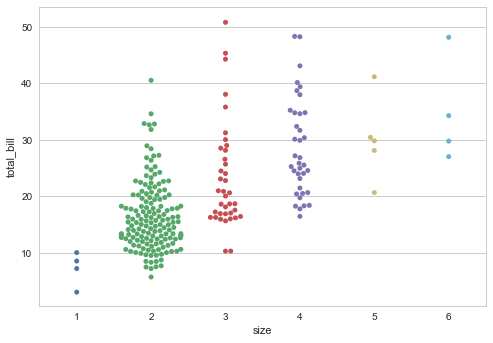

In [74]:
sns.swarmplot(x="size", y="total_bill", data=tips);

__orientation__

*parameter;* __swarmplot(..., orient)__

With these plots, it’s often helpful to put the categorical variable on the vertical axis (this is particularly useful when the category names are relatively long or there are many categories). You can force an orientation using the orient keyword, but usually plot orientation can be inferred from the datatypes of the variables passed to x and/or y:

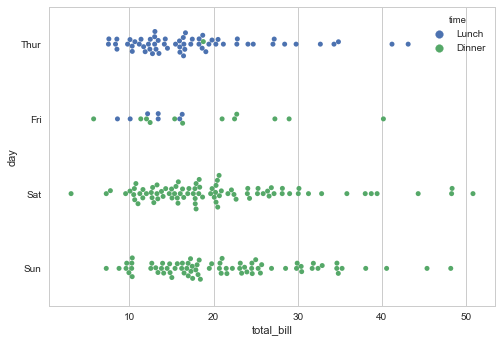

In [70]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

## Distributions of observations within categories

### Boxplot()

The first is the familiar __boxplot()__. This kind of plot shows the three quartile values of the distribution along with extreme values. The __“whiskers”__ extend to points that lie within __1.5 IQRs__ of the lower and upper quartile, and then observations that fall outside this range are displayed independently. Importantly, this means that each value in the boxplot corresponds to an actual observation in the data:

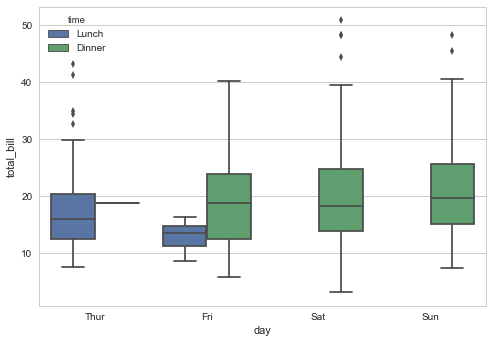

In [79]:
sns.boxplot(x='day', y='total_bill', hue='time', data=tips)

### Violinplot()

A different approach is a __violinplot()__, which combines a __boxplot__ with the __kernel density estimation__ procedure

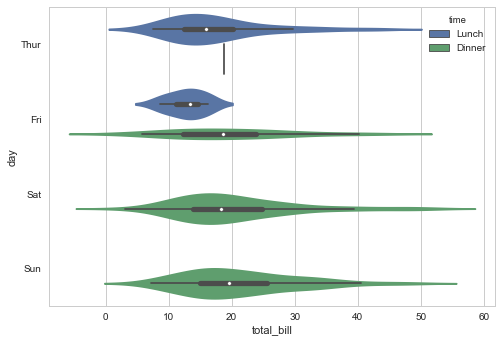

In [87]:
sns.violinplot(x='total_bill', y='day', hue='time', data=tips)

__KDE params in violinplot__

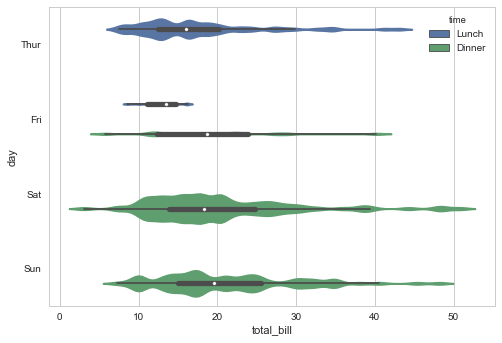

In [86]:
sns.violinplot(x='total_bill', y='day', hue='time', data=tips,
              bw=0.1, scale='count', scale_hue=False)

__splitting the violins__

It’s also possible to __“split”__ the violins when the __hue__ parameter has only two levels, which can allow for a more efficient use of space:

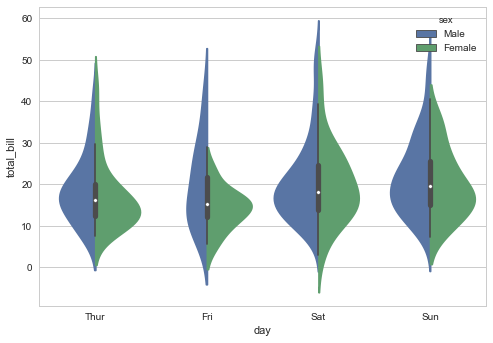

In [89]:
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips, split=True)

Finally, there are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values:

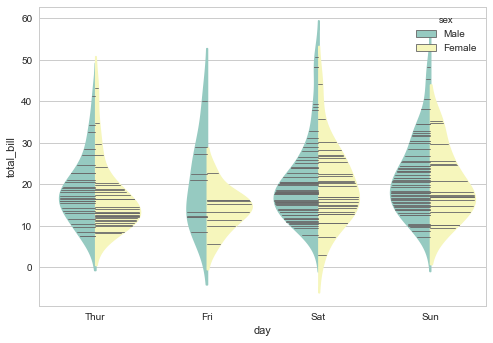

In [91]:
sns.violinplot(x='day', y='total_bill', hue='sex', data=tips,
              split=True, inner='stick', palette='Set3')

__swarmplot() and violinplot() combination__

It can also be useful to combine swarmplot() or swarmplot() with violinplot() or boxplot() to show each observation along with a summary of the distribution:

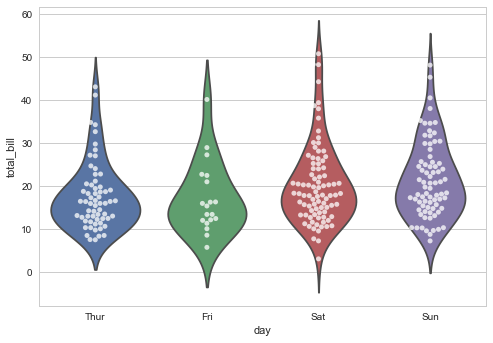

In [100]:
sns.violinplot(x='day', y='total_bill', data=tips, inner=None)
sns.swarmplot(x='day', y='total_bill', data=tips, color='w', alpha=0.75)

## Statistical estimation within categories

Often, rather than showing the distribution within each category, you might want to show the __central tendency__ of the values. Seaborn has two main ways to show this information, but importantly, the basic API for these functions is identical to that for the ones discussed above.

### Barplot()

A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the __barplot()__ function operates on a full dataset and shows an arbitrary estimate, using the __mean__ by default. When there are multiple observations in each category, it also uses bootstrapping to compute a __confidence interval__ around the estimate and plots that using __error bars__:

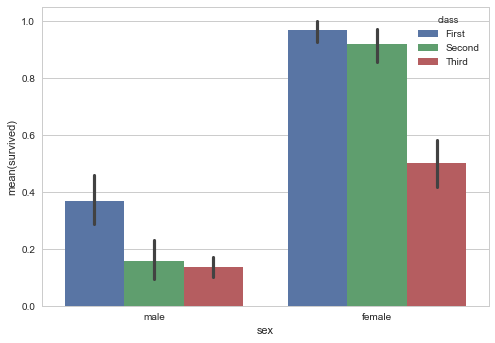

In [101]:
sns.barplot(x='sex', y='survived', hue='class', data=titanic)

### Countplot()

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function:

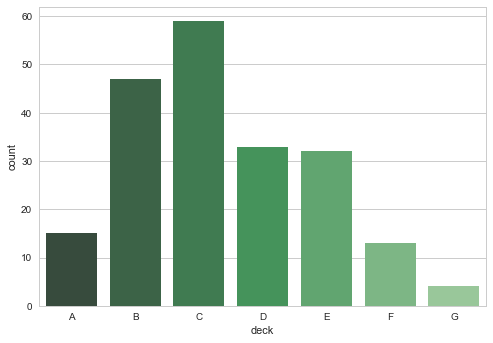

In [102]:
sns.countplot(x='deck', data=titanic, palette='Greens_d')

Both __barplot()__ and __countplot()__ can be invoked with all of the options discussed above, along with others that are demonstrated in the detailed documentation for each function:

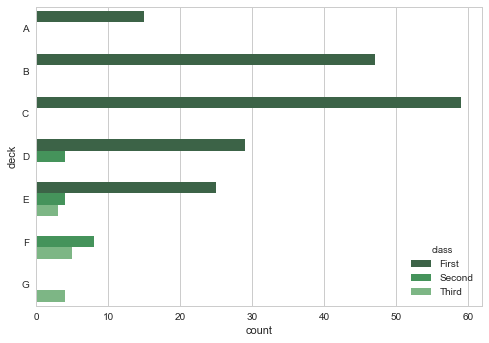

In [103]:
sns.countplot(y='deck', hue='class', data=titanic, palette='Greens_d')

### Point plots

An alternative style for visualizing the same information is offered by the __pointplot()__ function. 

This function also encodes the value of the estimate with height on the other axis, but rather than show a full bar it just plots the point estimate and confidence interval.

Additionally, pointplot connects points from the same hue category. This makes it easy to see how the main relationship is changing as a function of a second variable, because your eyes are quite good at picking up on differences of slopes:

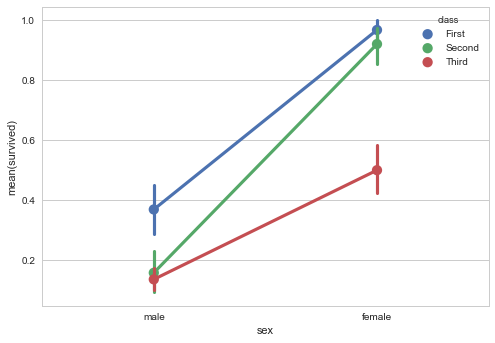

In [104]:
sns.pointplot(x='sex', y='survived', hue='class', data=titanic)

To make figures that reproduce well in black and white, it can be good to use different __markers__ and __line styles__ for the levels of the hue category:

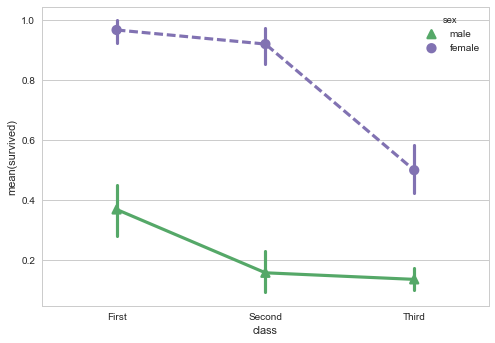

In [112]:
sns.pointplot(x='class', y='survived', hue='sex', data=titanic,
             palette={'male': 'g', 'female': 'm'},
             markers=['^', 'o'], linestyles=['-', '--'])

## Plotting “wide-form” data

While using __“long-form”__ or __“tidy”__ data is preferred, these functions can also by applied to __“wide-form”__ data in a variety of formats, including __pandas DataFrames__ or __two-dimensional numpy__ arrays. These objects should be passed directly to the data parameter:

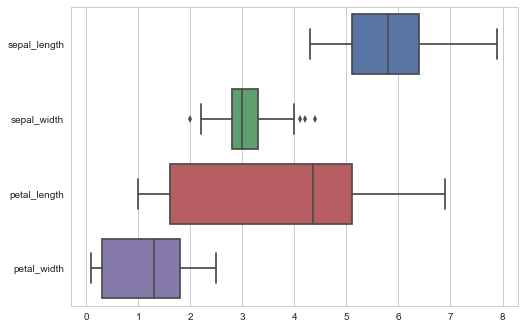

In [115]:
sns.boxplot(data=iris, orient='h')

Additionally, these functions accept __vectors of Pandas__ or __numpy objects__ rather than variables in a DataFrame:

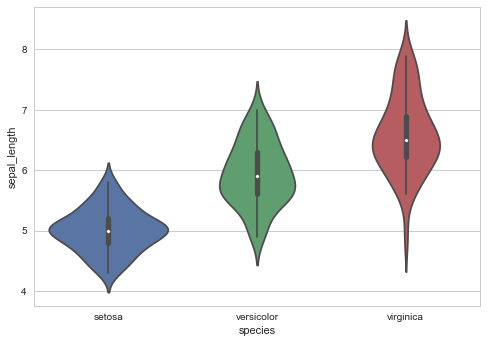

In [117]:
sns.violinplot(x=iris.species, y=iris.sepal_length)

### Controling Size and Shape:

To control the __size__ and __shape__ of plots made by the functions discussed above, you must __set up the figure__ yourself using matplotlib commands. Of course, this also means that the plots can happily coexist in a multi-panel figure with other kinds of plots:

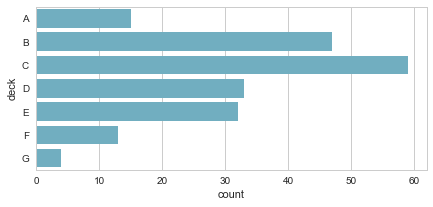

In [118]:
f, ax = plt.subplots(figsize=(7,3))
sns.countplot(y='deck', data=titanic, color='c')

## Drawing multi-panel categorical plots

Similar to the duality in the regression plots, you can either use the functions introduced above, or the higher-level function __factorplot()__, which combines these functions with a __FacetGrid()__ to add the ability to examine additional categories through the larger structure of the figure. By default, __factorplot()__ produces a __pairplot()__:

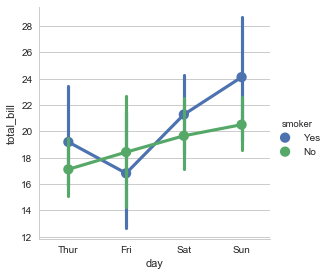

In [120]:
sns.factorplot(x='day', y='total_bill', hue='smoker', data=tips)

However, the __kind__ parameter lets you chose any of the kinds of plots discussed above:

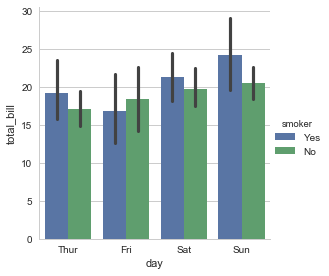

In [121]:
sns.factorplot(x='day', y='total_bill', hue='smoker', data=tips, kind='bar')

The main advantage of using a __factorplot()__ is that it is very easy to “facet” the plot and investigate the role of other categorical variables:

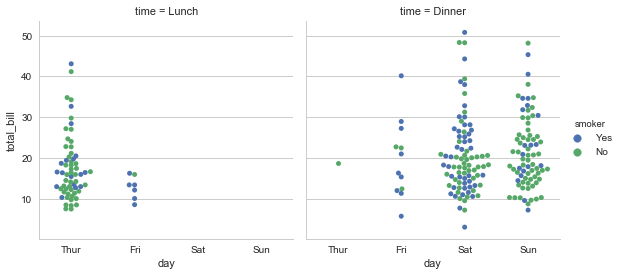

In [123]:
sns.factorplot(x='day', y='total_bill', hue='smoker',
              col='time', data=tips, kind='swarm')

Any kind of plot can be drawn. Because of the way __FacetGrid__ works, to change the size and shape of the figure you need to specify the __size__ and __aspect__ arguments, which apply to each facet:

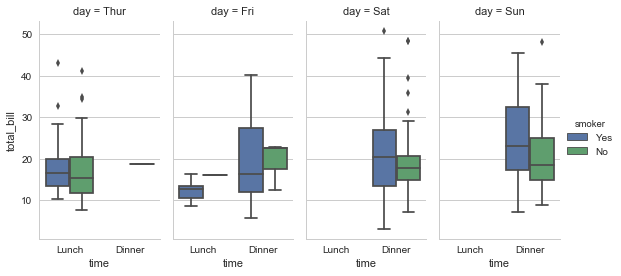

In [124]:
sns.factorplot(x='time', y='total_bill', hue='smoker',
              col='day', data=tips, kind='box', 
              size=4, aspect=0.5)

It is important to note that you could also make this plot by using boxplot() and FacetGrid directly. However, special care must be taken to ensure that the order of the categorical variables is enforced in each facet, either by using data with a Categorical datatype or by passing order and hue_order.

Because of the generalized API of the categorical plots, they should be easy to apply to other more complex contexts. For example, they are easily combined with a PairGrid to show categorical relationships across several different variables:

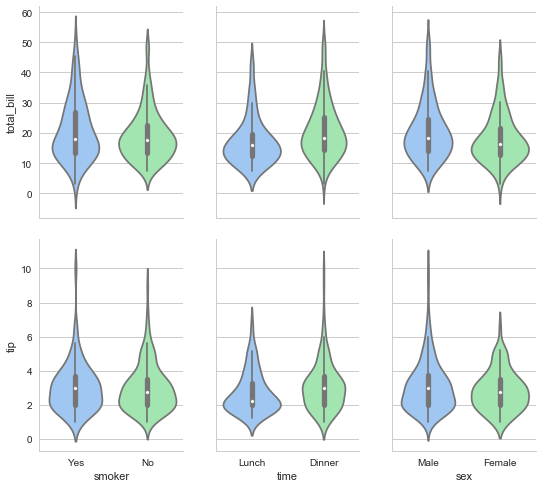

In [125]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");